Try out the data to see what we can do...

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

%matplotlib inline

# Check 濁水溪沖積扇水質資料1992-2019.xlsx

In [8]:
wa19_df = pd.read_excel('data/濁水溪沖積扇水質資料1992-2019.xlsx', sheet_name='2019')
wa19_df

,井號,井名,井別,取樣日期,Hard(mg/L),CL(mg/L),HCO3(mg/L),SO4(mg/L),NO3_N(mg/L),NO2_N(mg/L),...,Ag(mg/L),Temp(度),PH,EC(uS/cm),Organ_N,TOC(mg/L),Eh,CO3(mg/L),Turb,TSS(mg/L)
0,7010211,東芳(1),自記站,2019-06-26,410.0,7.1000,236.0,4.6,0.48,NaN,...,NaN,25.7,7.44,360,NaN,0.4,-31,1.0,NaN,NaN
1,7010221,東芳(2),自記站,2019-06-26,1110.0,9.6000,272.0,2.2,0.34,NaN,...,NaN,26.0,7.76,397,NaN,0.5,-50,1.0,NaN,NaN
2,7020111,洛津(1),自記站,2019-06-24,386.0,81.1000,454.0,58.4,1.53,NaN,...,NaN,26.1,7.54,979,NaN,0.9,-37,1.0,NaN,NaN
3,7020121,洛津(2),自記站,2019-06-24,361.0,1.9000,282.0,61.0,0.36,NaN,...,NaN,26.4,7.90,552,NaN,0.4,-56,1.8,NaN,NaN
4,7020131,洛津(3),自記站,2019-06-24,468.0,2.1000,261.0,38.6,0.12,NaN,...,NaN,25.9,7.84,470,NaN,0.3,-49,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,10040121,三和(2),自記站,2019-06-13,169.0,28.4000,185.0,2.9,0.08,NaN,...,NaN,26.7,6.39,310,NaN,0.7,25,1.0,NaN,NaN
161,10090111,東石(1),自記站,2019-09-26,44.1,98.4000,476.0,7.0,3.00,NaN,...,NaN,26.8,7.82,846,NaN,2.5,-39,1.0,NaN,NaN
162,10090121,東石(2),自記站,2019-09-26,317.0,1.4000,419.0,3.9,0.02,NaN,...,NaN,28.6,8.26,516,NaN,1.9,-64,1.0,NaN,NaN
163,10090131,東石(3),自記站,2019-09-26,670.0,1.3654,359.0,3.1,0.02,NaN,...,NaN,26.9,8.17,447,NaN,1.6,-56,1.0,NaN,NaN


In [5]:
type(wa19_df['取樣日期'])

pandas.core.series.Series

In [ ]:
wa_df = pd.DataFrame()
for yr in range(1992, 2020):
    wa_df = pd.concat([wa_df, pd.read_excel('data/濁水溪沖積扇水質資料1992-2019.xlsx', sheet_name=str(yr))], axis=0, join='outer')

In [14]:
wa_dict = pd.read_excel('data/濁水溪沖積扇水質資料1992-2019.xlsx', sheet_name=None)
len(wa_dict)

22

Okay...now we know there are only 22 years of data. Not all years in 1922-2019 are included.

In [188]:
wa_dict = pd.read_excel('data/濁水溪沖積扇水質資料1992-2019.xlsx', sheet_name=[_ for _ in range(22)])
wa_df = pd.DataFrame()

for i in range(len(wa_dict)):
    wa_dict[i]['sheet'] = [i for _ in range(len(wa_dict[i]))]
    wa_df = pd.concat([wa_df, wa_dict[i]], axis=0, join='outer')

In [189]:
wa_df

,井號,井名,井別,取樣日期,Hard(mg/L),CL(mg/L),HCO3(mg/L),SO4(mg/L),NO3_N(mg/L),NO2_N(mg/L),...,PH,EC(uS/cm),Organ_N,TOC(mg/L),Eh,CO3(mg/L),Turb,TSS(mg/L),sheet,檢驗日期
0,7010211,東芳(1),自記站,2019-06-26,410.0,7.10,236.0,4.60,0.48,NaN,...,7.44,360.0,NaN,0.4,-31.0,1.0,NaN,NaN,0,NaT
1,7010221,東芳(2),自記站,2019-06-26,1110.0,9.60,272.0,2.20,0.34,NaN,...,7.76,397.0,NaN,0.5,-50.0,1.0,NaN,NaN,0,NaT
2,7020111,洛津(1),自記站,2019-06-24,386.0,81.10,454.0,58.40,1.53,NaN,...,7.54,979.0,NaN,0.9,-37.0,1.0,NaN,NaN,0,NaT
3,7020121,洛津(2),自記站,2019-06-24,361.0,1.90,282.0,61.00,0.36,NaN,...,7.90,552.0,NaN,0.4,-56.0,1.8,NaN,NaN,0,NaT
4,7020131,洛津(3),自記站,2019-06-24,468.0,2.10,261.0,38.60,0.12,NaN,...,7.84,470.0,NaN,0.3,-49.0,3.0,NaN,NaN,0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,9150111,田洋(1),自記站,1992-06-08,492.0,56.61,0,63.99,0.00,-9999.990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,1992-06-08
11,9150121,田洋(2),自記站,1992-06-08,167.0,8.84,0,28.25,0.00,9999.999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,1992-06-08
12,9160111,海園(1),自記站,1992-06-08,141.0,75.50,0,6.49,0.00,-9999.990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,1992-06-08
13,9160121,海園(2),自記站,1992-06-08,210.0,253.00,0,33.71,0.00,-9999.990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,1992-06-08


In [190]:
wa_df.dropna(axis=0, how='all')

,井號,井名,井別,取樣日期,Hard(mg/L),CL(mg/L),HCO3(mg/L),SO4(mg/L),NO3_N(mg/L),NO2_N(mg/L),...,PH,EC(uS/cm),Organ_N,TOC(mg/L),Eh,CO3(mg/L),Turb,TSS(mg/L),sheet,檢驗日期
0,7010211,東芳(1),自記站,2019-06-26,410.0,7.10,236.0,4.60,0.48,NaN,...,7.44,360.0,NaN,0.4,-31.0,1.0,NaN,NaN,0,NaT
1,7010221,東芳(2),自記站,2019-06-26,1110.0,9.60,272.0,2.20,0.34,NaN,...,7.76,397.0,NaN,0.5,-50.0,1.0,NaN,NaN,0,NaT
2,7020111,洛津(1),自記站,2019-06-24,386.0,81.10,454.0,58.40,1.53,NaN,...,7.54,979.0,NaN,0.9,-37.0,1.0,NaN,NaN,0,NaT
3,7020121,洛津(2),自記站,2019-06-24,361.0,1.90,282.0,61.00,0.36,NaN,...,7.90,552.0,NaN,0.4,-56.0,1.8,NaN,NaN,0,NaT
4,7020131,洛津(3),自記站,2019-06-24,468.0,2.10,261.0,38.60,0.12,NaN,...,7.84,470.0,NaN,0.3,-49.0,3.0,NaN,NaN,0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,9150111,田洋(1),自記站,1992-06-08,492.0,56.61,0,63.99,0.00,-9999.990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,1992-06-08
11,9150121,田洋(2),自記站,1992-06-08,167.0,8.84,0,28.25,0.00,9999.999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,1992-06-08
12,9160111,海園(1),自記站,1992-06-08,141.0,75.50,0,6.49,0.00,-9999.990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,1992-06-08
13,9160121,海園(2),自記站,1992-06-08,210.0,253.00,0,33.71,0.00,-9999.990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,1992-06-08


There is no empty raw.

## Assign id

In [191]:
sdate = wa_df['取樣日期'].astype(str)
wa_df['id'] = ['{}_{}'.format(i, j) for i, j in zip(wa_df['井號'], sdate)]

In [193]:
wa_df.set_index('id', inplace=True)
wa_df

,井號,井名,井別,取樣日期,Hard(mg/L),CL(mg/L),HCO3(mg/L),SO4(mg/L),NO3_N(mg/L),NO2_N(mg/L),...,PH,EC(uS/cm),Organ_N,TOC(mg/L),Eh,CO3(mg/L),Turb,TSS(mg/L),sheet,檢驗日期
id,,,,,,,,,,,,,,,,,,,,,
7010211_2019-06-26,7010211,東芳(1),自記站,2019-06-26,410.0,7.10,236.0,4.60,0.48,NaN,...,7.44,360.0,NaN,0.4,-31.0,1.0,NaN,NaN,0,NaT
7010221_2019-06-26,7010221,東芳(2),自記站,2019-06-26,1110.0,9.60,272.0,2.20,0.34,NaN,...,7.76,397.0,NaN,0.5,-50.0,1.0,NaN,NaN,0,NaT
7020111_2019-06-24,7020111,洛津(1),自記站,2019-06-24,386.0,81.10,454.0,58.40,1.53,NaN,...,7.54,979.0,NaN,0.9,-37.0,1.0,NaN,NaN,0,NaT
7020121_2019-06-24,7020121,洛津(2),自記站,2019-06-24,361.0,1.90,282.0,61.00,0.36,NaN,...,7.90,552.0,NaN,0.4,-56.0,1.8,NaN,NaN,0,NaT
7020131_2019-06-24,7020131,洛津(3),自記站,2019-06-24,468.0,2.10,261.0,38.60,0.12,NaN,...,7.84,470.0,NaN,0.3,-49.0,3.0,NaN,NaN,0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9150111_1992-06-08,9150111,田洋(1),自記站,1992-06-08,492.0,56.61,0,63.99,0.00,-9999.990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,1992-06-08
9150121_1992-06-08,9150121,田洋(2),自記站,1992-06-08,167.0,8.84,0,28.25,0.00,9999.999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,1992-06-08
9160111_1992-06-08,9160111,海園(1),自記站,1992-06-08,141.0,75.50,0,6.49,0.00,-9999.990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,1992-06-08


## Check duplicates

In [195]:
wa_du = wa_df[wa_df.index.duplicated()]
wa_du.shape

(558, 43)

In [197]:
wa_du.sheet.unique()

array([ 2,  9, 12, 14, 15, 16, 19], dtype=int64)

In [201]:
# to see the reason of duplicates, the first ones are also kept
wa_df[wa_df.index.duplicated(keep=False)].to_excel('results/wra_1992-2019_duplicates_{}.xlsx'.format(date))

P.S. The Chinese words are distorted after saving into csv file so I use xlsx file to save instead.

### Drop duplicates

In [205]:
wa_df = wa_df[~wa_df.index.duplicated()]
wa_df.shape

(2228, 43)

In [206]:
wa_df.iloc[:, 4: -2].describe(include='all')

,Hard(mg/L),CL(mg/L),HCO3(mg/L),SO4(mg/L),NO3_N(mg/L),NO2_N(mg/L),NH3_N(mg/L),Ca(mg/L),Mg(mg/L),K(mg/L),...,Ag(mg/L),Temp(度),PH,EC(uS/cm),Organ_N,TOC(mg/L),Eh,CO3(mg/L),Turb,TSS(mg/L)
count,699.000000,1810,1127.0,1810,1878,403,1959,1762.0,1762.00,1752.00,...,367,1841.000000,1717.000000,1766.000000,114.000000,1594,841.000000,1127,0.0,58.000000
unique,NaN,585,423.0,868,395,61,466,919.0,871.00,599.00,...,6,NaN,NaN,NaN,NaN,293,NaN,16,NaN,NaN
top,NaN,MDL,0.0,MDL,MDL,MDL,MDL,30.1,9.11,0.78,...,MDL,NaN,NaN,NaN,NaN,MDL,NaN,MDL,NaN,NaN
freq,NaN,66,104.0,120,500,203,228,11.0,14.00,57.00,...,335,NaN,NaN,NaN,NaN,87,NaN,504,NaN,NaN
mean,429.566833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,25.783254,8.143856,921.120674,2.847895,NaN,18.902140,NaN,NaN,936.594828
std,1313.431212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.060335,24.051228,2426.057308,1.846836,NaN,155.704994,NaN,NaN,3946.287873
min,4.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,16.500000,5.060000,3.830000,0.140000,NaN,-395.000000,NaN,NaN,15.500000
25%,115.916500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,24.510000,7.000000,396.000000,2.062500,NaN,-105.000000,NaN,NaN,267.250000
50%,190.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,25.500000,7.360000,509.000000,2.600000,NaN,-18.000000,NaN,NaN,342.000000
75%,327.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,26.800000,7.670000,716.000000,3.275000,NaN,162.000000,NaN,NaN,519.250000


In [209]:
wa_df.iloc[:, 4: -2].describe().to_clipboard()

In [215]:
wa_de = wa_df.iloc[:, 4: -2].replace('MDL', 0).describe()
wa_de

,Hard(mg/L),CL(mg/L),HCO3(mg/L),SO4(mg/L),NO3_N(mg/L),NO2_N(mg/L),NH3_N(mg/L),Ca(mg/L),Mg(mg/L),K(mg/L),...,Ag(mg/L),Temp(度),PH,EC(uS/cm),Organ_N,TOC(mg/L),Eh,CO3(mg/L),Turb,TSS(mg/L)
count,699.000000,1810.000000,1127.00000,1810.000000,1878.000000,403.000000,1959.000000,1762.000000,1762.000000,1752.000000,...,367.000000,1841.000000,1717.000000,1766.000000,114.000000,1594.000000,841.000000,1127.000000,0.0,58.000000
mean,429.566833,320.802257,255.50000,107.296123,0.866778,-198.989007,41.981848,74.569801,37.306728,10.030954,...,0.001853,25.783254,8.143856,921.120674,2.847895,1.477202,18.902140,0.547826,NaN,936.594828
std,1313.431212,2532.679913,144.97346,315.291636,7.151549,1716.223817,637.830765,74.090644,152.946553,55.109873,...,0.006558,2.060335,24.051228,2426.057308,1.846836,1.765028,155.704994,1.421127,NaN,3946.287873
min,4.200000,0.000000,0.00000,0.000000,-99.999000,-9999.990000,0.000000,0.000000,-0.386000,0.000000,...,0.000000,16.500000,5.060000,3.830000,0.140000,-0.200000,-395.000000,-1.400000,NaN,15.500000
25%,115.916500,3.900000,200.50000,6.162500,0.000000,0.000000,0.080000,33.300000,7.300000,1.470000,...,0.000000,24.510000,7.000000,396.000000,2.062500,0.400000,-105.000000,0.000000,NaN,267.250000
50%,190.000000,8.330000,260.00000,48.000000,0.050000,0.000000,0.300000,53.900000,13.500000,2.100000,...,0.000000,25.500000,7.360000,509.000000,2.600000,1.000000,-18.000000,0.500000,NaN,342.000000
75%,327.000000,21.075000,319.00000,113.750000,0.220000,0.009000,0.920000,93.775000,26.600000,3.482500,...,0.000000,26.800000,7.670000,716.000000,3.275000,1.800000,162.000000,1.000000,NaN,519.250000
max,16200.000000,41400.000000,2452.00000,7360.000000,107.000000,9999.999000,9999.999000,1008.200000,2980.000000,1220.000000,...,0.050000,34.900000,718.000000,37700.000000,15.000000,18.300000,826.000000,38.600000,NaN,30400.000000


In [208]:
wa_df.iloc[:, 4: -2].replace('MDL', 0).describe().to_clipboard()

In [211]:
wa_df.to_excel('data/wra_1992-2019_compile_{}.xlsx'.format(date))

# Exploral analysis
Select the columns having more than 1500 measurements, and exclude the NAs in them. The MDLs are replaced by 0.

In [216]:
wa_de.loc['count'].sort_values()

Turb                   0.0
TSS(mg/L)             58.0
Organ_N              114.0
BOD(mg/L)            355.0
Ag(mg/L)             367.0
COD(mg/L)            376.0
NO2_N(mg/L)          403.0
TDS(mg/L)            600.0
Hard(mg/L)           699.0
Hg(mg/L)             754.0
ALK(mg/L)            759.0
OxReElevel(mg/L)     816.0
Eh                   841.0
CO3(mg/L)           1127.0
HCO3(mg/L)          1127.0
TOC(mg/L)           1594.0
Sulfide             1602.0
PH                  1717.0
Pb(mg/L)            1749.0
K(mg/L)             1752.0
Ca(mg/L)            1762.0
Mg(mg/L)            1762.0
Na(mg/L)            1762.0
EC(uS/cm)           1766.0
SO4(mg/L)           1810.0
CL(mg/L)            1810.0
ECOLI(個/100mL)      1826.0
Aso                 1828.0
Temp(度)             1841.0
NO3_N(mg/L)         1878.0
Cd(mg/L)            1911.0
Mn(mg/L)            1911.0
Cu(mg/L)            1913.0
Cr(mg/L)            1914.0
Zn(mg/L)            1914.0
Fe(mg/L)            1918.0
NH3_N(mg/L)         1959.0
N

In [217]:
cols = wa_de.columns[wa_de.loc['count'] > 1500]
wa_se = wa_df.loc[:, cols].dropna(axis=0, how='any').replace('MDL', 0)
wa_se

,CL(mg/L),SO4(mg/L),NO3_N(mg/L),NH3_N(mg/L),Ca(mg/L),Mg(mg/L),K(mg/L),Na(mg/L),Aso,Fe(mg/L),...,ECOLI(個/100mL),Sulfide,Cr(mg/L),Cu(mg/L),Zn(mg/L),Pb(mg/L),Temp(度),PH,EC(uS/cm),TOC(mg/L)
id,,,,,,,,,,,,,,,,,,,,,
7010211_2019-06-26,7.1,4.6,0.48,0.76,32.4,8.77,1.07,34.4,0.0497,4.500,...,5.0,0.02,0.0058,0.0055,0.0059,0.0056,25.7,7.44,360.0,0.40
7010221_2019-06-26,9.6,2.2,0.34,0.58,44.0,6.64,1.05,32.1,0.0015,0.478,...,5.0,0.02,0.0058,0.0055,0.0059,0.0056,26.0,7.76,397.0,0.50
7020111_2019-06-24,81.1,58.4,1.53,1.73,112.0,24.00,3.70,49.3,0.0610,2.860,...,5.0,0.04,0.0058,0.0060,0.0120,0.0056,26.1,7.54,979.0,0.90
7020121_2019-06-24,1.9,61.0,0.36,0.59,70.5,10.40,1.37,29.5,0.0057,0.418,...,10.0,0.04,0.0058,0.0055,0.0059,0.0056,26.4,7.90,552.0,0.40
7020131_2019-06-24,2.1,38.6,0.12,0.35,57.1,8.67,1.41,32.4,0.0023,0.136,...,5.0,0.05,0.0058,0.0055,0.0059,0.0056,25.9,7.84,470.0,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10050121_1999-01-01,7.5,0.0,0.00,0.59,30.9,7.41,1.06,25.8,0.0400,0.230,...,1.0,0.08,0.0000,0.0200,0.0100,0.0000,26.2,7.98,297.0,0.90
10070111_1999-01-01,47.1,34.6,0.16,2.38,58.1,14.00,7.82,116.0,0.0700,2.170,...,25.0,0.00,0.0000,0.0000,0.0300,0.0000,24.5,7.80,818.0,3.72
10070131_1999-01-01,16.0,20.6,0.10,1.80,45.1,14.60,4.69,74.8,0.0400,1.160,...,5.0,0.00,0.0000,0.0000,0.0200,0.0000,26.4,7.84,592.0,4.22


In [218]:
wa_se.columns

Index(['CL(mg/L)', 'SO4(mg/L)', 'NO3_N(mg/L)', 'NH3_N(mg/L)', 'Ca(mg/L)',
       'Mg(mg/L)', 'K(mg/L)', 'Na(mg/L)', 'Aso', 'Fe(mg/L)', 'Mn(mg/L)',
       'Cd(mg/L)', 'ECOLI(個/100mL)', 'Sulfide', 'Cr(mg/L)', 'Cu(mg/L)',
       'Zn(mg/L)', 'Pb(mg/L)', 'Temp(度)', 'PH', 'EC(uS/cm)', 'TOC(mg/L)'],
      dtype='object')

In [237]:
pd.concat([wa_df.iloc[:, :4], wa_se], axis=1, join='inner').to_excel('data/wra_1992-2019_filtered_{}.xlsx'.format(date))

## PCA

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [221]:
scaler = StandardScaler()
pca = PCA(n_components='mle')
x = scaler.fit_transform(wa_se)
pca.fit(x)

PCA(n_components='mle')

In [222]:
pca.explained_variance_ratio_

array([0.2433062 , 0.10480662, 0.0726775 , 0.06007767, 0.0575156 ,
       0.04976193, 0.04652359, 0.04561735, 0.04470023, 0.04294087,
       0.04142294, 0.03837167, 0.03526173, 0.03267223, 0.02672869,
       0.02195566, 0.01990008, 0.00900934, 0.00391575, 0.00164669,
       0.00101421])

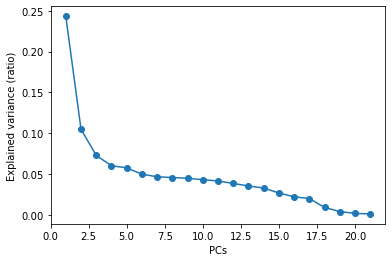

In [223]:
plt.plot([_+1 for _ in range(len(pca.explained_variance_ratio_))], pca.explained_variance_ratio_, marker='o')
plt.xlabel('PCs')
plt.ylabel('Explained variance (ratio)')
plt.savefig('results/wra_pca_screeplot_{}.png'.format(date))

In [224]:
cols_simplified = []
for col in wa_se.columns:
    if col == 'Sulfide':
        cols_simplified.append(col)
    elif len(col) > 4:
        cols_simplified.append(col[:col.find('(')])
    else:
        cols_simplified.append(col)

cols_simplified

['CL',
 'SO4',
 'NO3_N',
 'NH3_N',
 'Ca',
 'Mg',
 'K',
 'Na',
 'Aso',
 'Fe',
 'Mn',
 'Cd',
 'ECOLI',
 'Sulfide',
 'Cr',
 'Cu',
 'Zn',
 'Pb',
 'Temp',
 'PH',
 'EC',
 'TOC']

In [225]:
for _ in cols_simplified:
    print(_, end=', ')

CL, SO4, NO3_N, NH3_N, Ca, Mg, K, Na, Aso, Fe, Mn, Cd, ECOLI, Sulfide, Cr, Cu, Zn, Pb, Temp, PH, EC, TOC, 

In [226]:
prinaxe_df = pd.DataFrame(pca.components_[:2], columns=cols_simplified, index=['PC1', 'PC2']).T
prinaxe_df

,PC1,PC2
CL,0.408923,0.061429
SO4,0.373740,-0.136866
NO3_N,-0.022819,-0.022607
NH3_N,0.253504,-0.037699
Ca,0.261772,-0.088382
Mg,0.414030,-0.052856
K,0.383801,-0.070912
Na,0.411338,-0.037367
Aso,0.096112,-0.036225
Fe,0.099270,0.598681


In [227]:
pc_df = pd.DataFrame(pca.transform(x)[:, :2], columns=['PC1', 'PC2'], index=wa_se.index)
pc_df

,PC1,PC2
id,,
7010211_2019-06-26,-0.623823,0.138956
7010221_2019-06-26,-0.667970,0.141063
7020111_2019-06-24,0.056067,-0.064734
7020121_2019-06-24,-0.444727,0.064744
7020131_2019-06-24,-0.570381,0.103715
...,...,...
10050121_1999-01-01,-0.630504,0.140801
10070111_1999-01-01,-0.094210,-0.345756
10070131_1999-01-01,-0.326011,-0.230609


In [228]:
prinaxe_df[(abs(prinaxe_df.PC1) > 0.2) | (abs(prinaxe_df.PC2) > 0.2)]

,PC1,PC2
CL,0.408923,0.061429
SO4,0.373740,-0.136866
NH3_N,0.253504,-0.037699
Ca,0.261772,-0.088382
Mg,0.414030,-0.052856
K,0.383801,-0.070912
Na,0.411338,-0.037367
Fe,0.099270,0.598681
Mn,0.100929,0.593199
Pb,0.042448,0.449059


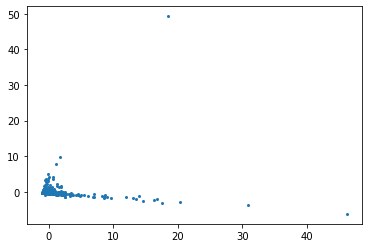

In [231]:
plt.scatter(pc_df.PC1, pc_df.PC2, s=4)
#plt.xlim(-5, 20)

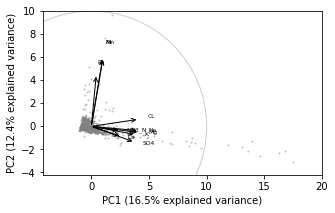

In [235]:
from matplotlib.patches import Circle

X = prinaxe_df[(abs(prinaxe_df.PC1) > 0.2) | (abs(prinaxe_df.PC2) > 0.2)] # components_
X_df = pc_df  # dataframe at least have label and pc socres
variance = [0.165, 0.124]  # the pca variance
multiple = 10  # the multiple for matching the scale between scores and components

fig, ax = plt.subplots(1, 1, figsize = (5, 5))

ax.set(
    xlabel = 'PC1 ({}% explained variance)'.format(
            round(variance[0] * 100, 1)
            ),
    ylabel = 'PC2 ({}% explained variance)'.format(
            round(variance[1] * 100, 1)
            ),
    xlim = [-4.2, 20],
    ylim = [-4.2, 10],
    aspect = 'equal'
        )

# draw components
for element in X.index:
    ax.annotate(
            '', xy=(0,0),
            xytext=(X.PC1[element] * multiple,
                    X.PC2[element] * multiple),
            arrowprops=dict(arrowstyle = '<-', 
                            color = 'black')
    )
    ax.text(
        X.PC1[element] * multiple * 1.2,
        X.PC2[element] * multiple * 1.2,
        element, fontsize=6
    )

# draw circle
ax.add_artist(
      Circle((0,0), radius = 1 * multiple, color = 'grey', fill = False, alpha = 0.4)
    ) 

# draw data points in scores     
ax.scatter(X_df.loc[: , 'PC1'], X_df.loc[: , 'PC2'], s = 4, linewidth = 0,
                   c = 'grey', alpha = 0.5
                  )


fig.savefig('results/wra_pca_biplots_{}.png'.format(date))

### Export results

In [232]:
pc_df.to_csv('results/wra_pca_scores_{}.csv'.format(date))
prinaxe_df.to_csv('results/wra_pca_components_{}.csv'.format(date))

### Clustering

In [233]:
import dask
import hdbscan
labels = []
param__hdscan = {'min_samples': [2, 5, 10, 12, 15, 20], 'min_cluster_size': [10, 20, 30, 40, 50, 60]}


for min_samples in param__hdscan['min_samples']:
    for min_cluster_size in param__hdscan['min_cluster_size']:
        clustering = hdbscan.HDBSCAN(min_samples = min_samples, min_cluster_size = min_cluster_size, core_dist_n_jobs = -1)
        labels.append(clustering.fit_predict(x))

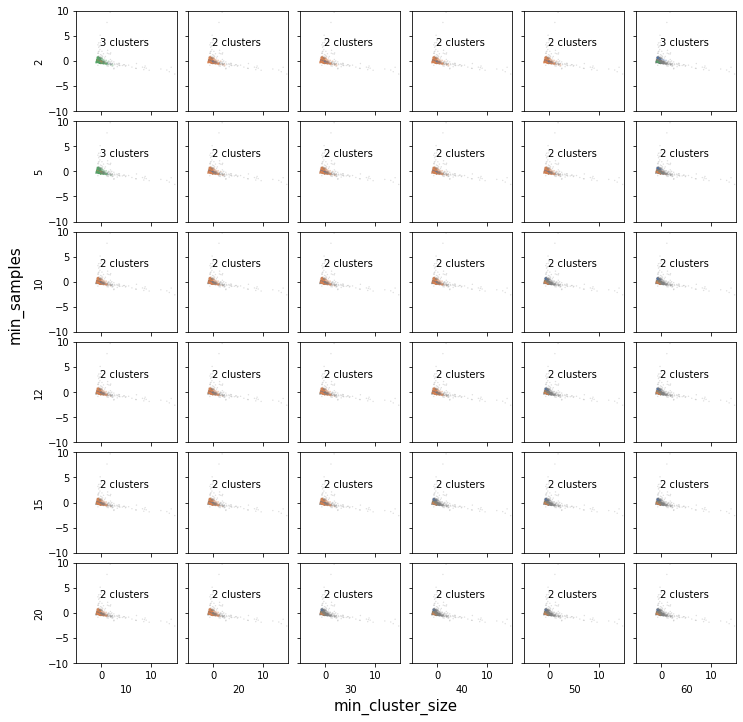

In [234]:
fig , axes = plt.subplots(len(param__hdscan['min_samples']), len(param__hdscan['min_cluster_size']), figsize = (12, 12), sharex = 'all', sharey = 'all')
axes[0,0].set_xlim(-5, 15)
axes[0,0].set_ylim(-10, 10)

index = 0
for label, ax in zip(labels, axes.flatten()):
    color_palette = sns.color_palette('deep', label.max() + 1)
    cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                 for x in label]
    ax.scatter(pc_df.iloc[:, 0], pc_df.iloc[:, 1], s = 2, linewidth = 0, c = cluster_colors, alpha = 0.25)
    ax.set_aspect('equal')
    ax.text(-0.2, 3, '{} clusters'.format(label.max() + 1, fontsize = 5))
    # if the index is a multiple of len(param__hdscan['min_cluster_size'], it represent the first column of axes
    if (index % len(param__hdscan['min_cluster_size'])) == 0: 
        ax.set_ylabel(param__hdscan['min_samples'][index // len(param__hdscan['min_cluster_size'])])   # floor division 6//6=1
    # if the index is the biggest value of floor division, it represent the last row of axes
    if (index // len(param__hdscan['min_cluster_size'])) == (len(labels)//len(param__hdscan['min_cluster_size']) - 1): 
        ax.set_xlabel(param__hdscan['min_cluster_size'][index % len(param__hdscan['min_samples'])])   #residue 6%6=0
    index += 1
fig.text(0.06, 0.5, 'min_samples', fontsize = 15, rotation = 90, ha = 'center')
fig.text(0.5, 0.07, 'min_cluster_size', fontsize = 15, ha = 'center')
fig.subplots_adjust(wspace = 0.02, hspace = 0.1)
fig.savefig('results/wra_hdbscan_search_pca_{}.png'.format(date))

Mmm...the clustering results plotted on the PC space don't have much sense...